In [2]:
import pandas as pd

data = pd.read_csv('data//50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Initial cost: 16283325121.423775
Final cost: nan


C:\Users\engsm\AppData\Local\Temp\ipykernel_16740\629189666.py:12: RuntimeWarning: overflow encountered in square
  J = (1/(2*m)) * sum((linear_regression(X, theta) - y)**2)
C:\Users\engsm\AppData\Local\Temp\ipykernel_16740\629189666.py:18: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha) * X.T.dot(linear_regression(X, theta) - y)


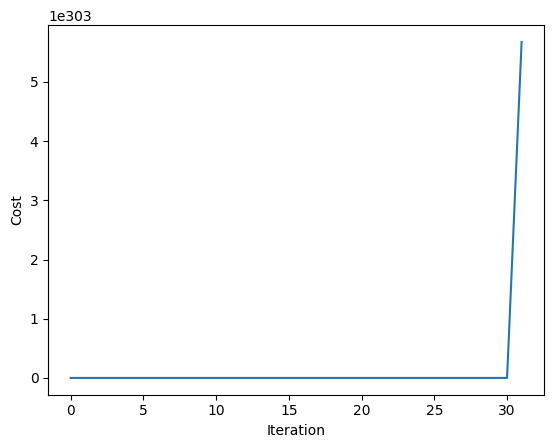

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

def linear_regression(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    J = (1/(2*m)) * sum((linear_regression(X, theta) - y)**2)
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha) * X.T.dot(linear_regression(X, theta) - y)
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

X = np.c_[np.ones(X.shape[0]), X]
theta = np.random.rand(X.shape[1])

J_initital = cost_function(X, y, theta)
print(f'Initial cost: {J_initital}')

theta, J_history = gradient_descent(X, y, theta, 0.00000001, 1000)

J_final = J_history[-1]
print(f'Final cost: {J_final}')

plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()
    

    

[[ 0.52680921  0.08185667  0.51589491]
 [ 0.51016867  0.16113475  0.45678828]
 [ 0.45479381 -0.11388995  0.38055852]
 [ 0.39994564 -0.01793196  0.32813004]
 [ 0.38624694 -0.16729273  0.29203048]]
Initial cost: 7484410938.591062
Initial R2: -10.832962177493929
Final cost: 35786659.74868545
Final R2: 0.943420772223825


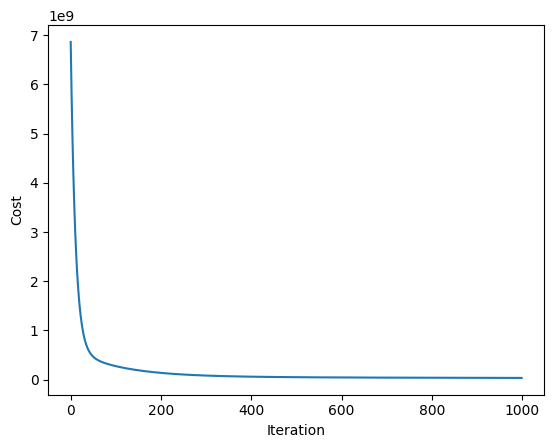

In [21]:
from sklearn.metrics import r2_score

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# apply feature scaling throught mean normalization
X = (X - X.mean(axis=0)) / X.max(axis=0)
print(X[:5])

X = np.c_[np.ones(X.shape[0]), X]
theta = np.random.rand(X.shape[1])

J_initital = cost_function(X, y, theta)
print(f'Initial cost: {J_initital}')

r2_initial = r2_score(y, linear_regression(X, theta))
print(f'Initial R2: {r2_initial}')

theta, J_history = gradient_descent(X, y, theta, 0.001, 1000)

J_final = J_history[-1]
print(f'Final cost: {J_final}')

r2_final = r2_score(y, linear_regression(X, theta))
print(f'Final R2: {r2_final}')

plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

model = LinearRegression()
model.fit(X, y)
r2_score(y, model.predict(X))

0.9608231830180131

In [ ]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

model = LinearRegression()
model.fit(X, y)
r2_score(y, model.predict(X))


0.968321535674788

In [ ]:
# set learning rate in sklearn model
# you should use the SGDRegressor class
from sklearn.linear_model import SGDRegressor



array([[1.00000000e+00, 1.65349200e+05, 1.36897800e+05, 4.71784100e+05,
        2.73403579e+10, 2.26359417e+10, 7.80091235e+10, 1.87410076e+10,
        6.45862054e+10, 2.22580237e+11],
       [1.00000000e+00, 1.62597700e+05, 1.51377590e+05, 4.43898530e+05,
        2.64380120e+10, 2.46136480e+10, 7.21768800e+10, 2.29151748e+10,
        6.71962897e+10, 1.97045905e+11],
       [1.00000000e+00, 1.53441510e+05, 1.01145550e+05, 4.07934540e+05,
        2.35442970e+10, 1.55199259e+10, 6.25940918e+10, 1.02304223e+10,
        4.12607634e+10, 1.66410589e+11],
       [1.00000000e+00, 1.44372410e+05, 1.18671850e+05, 3.83199620e+05,
        2.08433928e+10, 1.71329410e+10, 5.53234527e+10, 1.40830080e+10,
        4.54750078e+10, 1.46841949e+11],
       [1.00000000e+00, 1.42107340e+05, 9.13917700e+04, 3.66168420e+05,
        2.01944961e+10, 1.29874413e+10, 5.20352202e+10, 8.35245562e+09,
        3.34647800e+10, 1.34079312e+11],
       [1.00000000e+00, 1.31876900e+05, 9.98147100e+04, 3.62861360e+05,
   